Importing Dependencies

In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

Data Collection and Processing

In [8]:
# loading csv to pandas dataframe
data = pd.read_csv('framingham.csv')

In [9]:
# printing first 5 rows of the dataset
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [10]:
# printing last 5 rows of dataset
data.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,3.0,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0
4239,0,39,3.0,1,30.0,0.0,0,0,0,196.0,133.0,86.0,20.91,85.0,80.0,0


In [11]:
# number of rows and columns in the dataset
data.shape

(4240, 16)

In [12]:
# getting some info about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [13]:
# checking for missing values
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [14]:
# Finding percentage of missing values in each column
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

male               0.000000
age                0.000000
education          2.476415
currentSmoker      0.000000
cigsPerDay         0.683962
BPMeds             1.250000
prevalentStroke    0.000000
prevalentHyp       0.000000
diabetes           0.000000
totChol            1.179245
sysBP              0.000000
diaBP              0.000000
BMI                0.448113
heartRate          0.023585
glucose            9.150943
TenYearCHD         0.000000
dtype: float64

<ipython-input-15-9374ae5eeae0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.education)


<Axes: xlabel='education', ylabel='Density'>

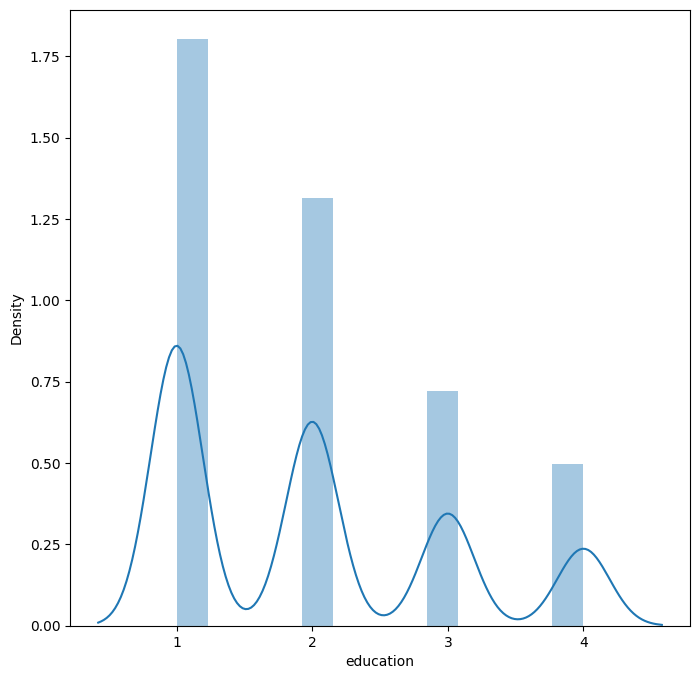

In [15]:
# analyzing the distribution of data base on education
flg, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.education)

In [16]:
# filling missing values in education with the mean
data['education'].fillna(data['education'].mean(), inplace=True)

In [17]:
# checking for missing values in education
data.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<ipython-input-18-6a251181b156>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.cigsPerDay)
<ipython-input-18-6a251181b156>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.BPMeds)
<ipython-input-18-6a251181b156>:7: UserWarning: 

`distplot` is a deprecated function and will be remove

<Axes: xlabel='glucose', ylabel='Density'>

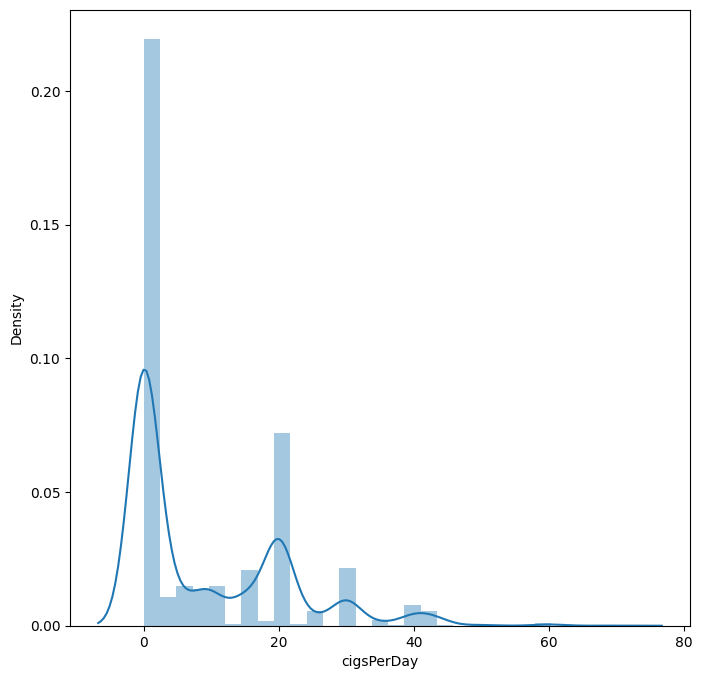

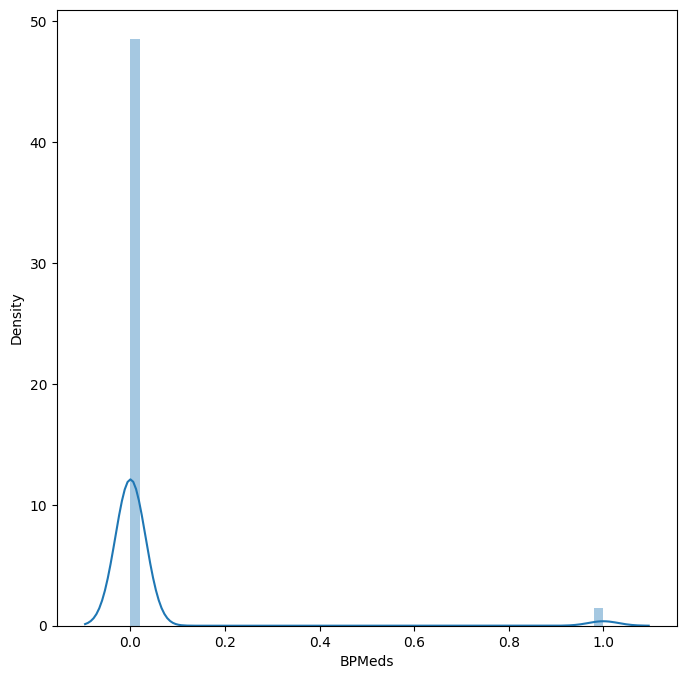

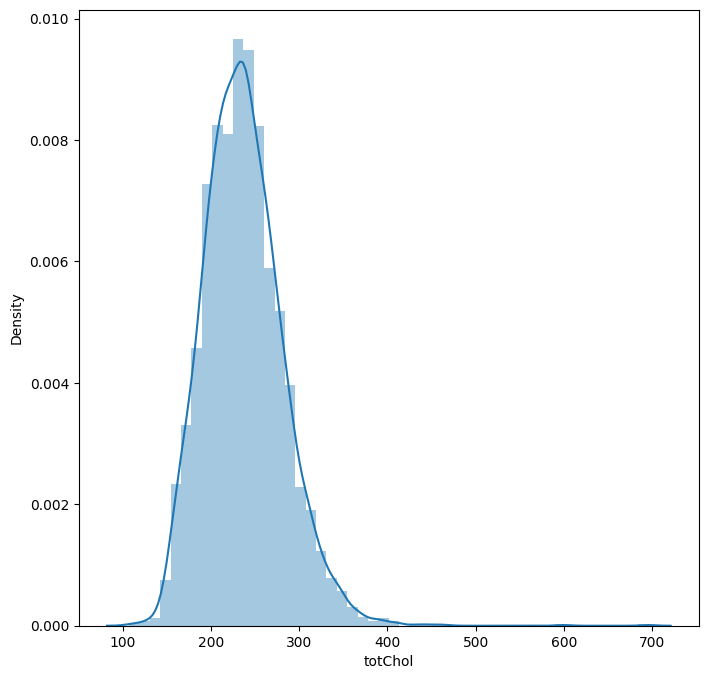

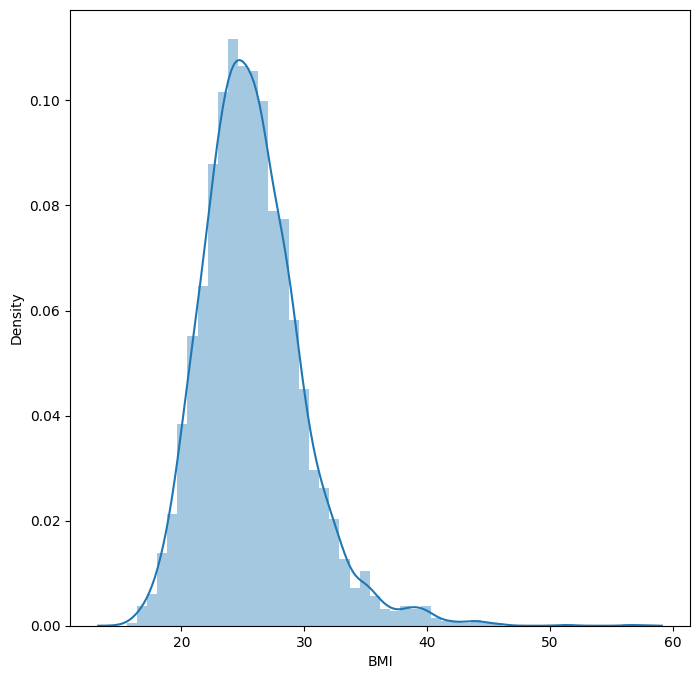

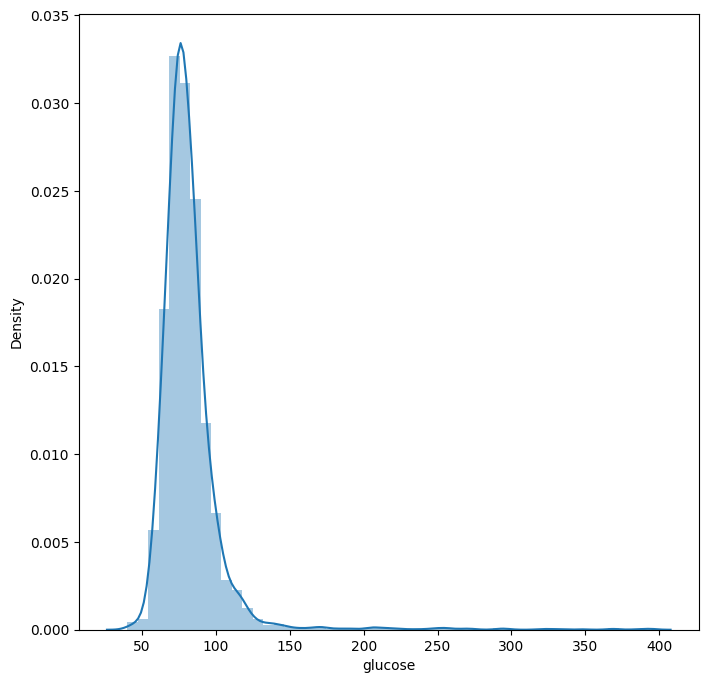

In [18]:
# analyzing the distribution of data based on other parameters
flg, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.cigsPerDay)
flg, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.BPMeds)
flg, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.totChol)
flg, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.BMI)
flg, ax = plt.subplots(figsize=(8,8))
sns.distplot(data.glucose)

In [19]:
# filling missing values in other columns with mean or median
data['cigsPerDay'].fillna(data['cigsPerDay'].median(), inplace=True)
data['BPMeds'].fillna(data['BPMeds'].median(), inplace=True)
data['totChol'].fillna(data['totChol'].mean(), inplace=True)
data['BMI'].fillna(data['BMI'].mean(), inplace=True)
data['glucose'].fillna(data['glucose'].mean(), inplace=True)

In [20]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          1
glucose            0
TenYearCHD         0
dtype: int64

In [21]:
data.shape

(4240, 16)

In [22]:
# removing single row with missing heartRate value
data.dropna(subset=['heartRate'], inplace=True)

In [23]:
data.shape

(4239, 16)

In [24]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [25]:
# statistical measures about the data
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000,4239.000000
mean,0.429111,49.576787,1.979675,0.493984,8.942203,0.029252,0.005898,0.310451,0.025714,236.703698,132.345129,82.899623,25.799978,75.878981,81.961524,0.151687
std,0.495008,8.571091,1.007088,0.500023,11.905369,0.168532,0.076578,0.462733,0.158298,44.331917,22.027266,11.911182,4.070814,12.025348,22.834020,0.358759
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.075000,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.025000,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [26]:
# checking the distribution of target variable
data['TenYearCHD'].value_counts()

0    3596
1     643
Name: TenYearCHD, dtype: int64

1 --> Defective Heart

0 --> Healthy Heart


Splitting the Features and Target

In [27]:
X = data.drop(columns='TenYearCHD', axis=1)
Y = data['TenYearCHD']

In [28]:
print(X)

      male  age  education  currentSmoker  cigsPerDay  BPMeds  \
0        1   39        4.0              0         0.0     0.0   
1        0   46        2.0              0         0.0     0.0   
2        1   48        1.0              1        20.0     0.0   
3        0   61        3.0              1        30.0     0.0   
4        0   46        3.0              1        23.0     0.0   
...    ...  ...        ...            ...         ...     ...   
4235     0   48        2.0              1        20.0     0.0   
4236     0   44        1.0              1        15.0     0.0   
4237     0   52        2.0              0         0.0     0.0   
4238     1   40        3.0              0         0.0     0.0   
4239     0   39        3.0              1        30.0     0.0   

      prevalentStroke  prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  \
0                   0             0         0    195.0  106.0   70.0  26.97   
1                   0             0         0    250.0  121.0

In [29]:
X.to_csv('features_heart.csv')

In [30]:
print(Y)

0       0
1       0
2       0
3       1
4       0
       ..
4235    0
4236    0
4237    0
4238    0
4239    0
Name: TenYearCHD, Length: 4239, dtype: int64


In [31]:
Y.to_csv('target_heart.csv')

Splitting the data into Training data and Test data

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [33]:
print(X.shape, X_train.shape, X_test.shape)

(4239, 15) (3391, 15) (848, 15)


In [34]:
Y_train.value_counts()

0    2881
1     510
Name: TenYearCHD, dtype: int64

In [35]:
Y_test.value_counts()

0    715
1    133
Name: TenYearCHD, dtype: int64

Model Training

Logistic Regression

In [36]:
lr = LogisticRegression()

In [37]:
# training the LogisticRegression model with Training data
lr.fit(X_train, Y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Model Evaluaion (Logistic Regression)

Accuracy Score

In [38]:
# accuracy on training data
X_train_pred_lr = lr.predict(X_train)
train_accuracy_lr = accuracy_score(X_train_pred_lr, Y_train)

In [39]:
print('Accuracy on Training data : ', train_accuracy_lr)

Accuracy on Training data :  0.8519610734296668


In [40]:
# accuracy on test data
X_test_pred_lr = lr.predict(X_test)
test_accuracy_lr = accuracy_score(X_test_pred_lr, Y_test)

In [41]:
print('Accuracy on Test data : ', test_accuracy_lr)

Accuracy on Test data :  0.8443396226415094


Metrics for Logistic Regression

In [42]:
print(classification_report(Y_test, X_test_pred_lr))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       715
           1       0.57      0.03      0.06       133

    accuracy                           0.84       848
   macro avg       0.71      0.51      0.49       848
weighted avg       0.80      0.84      0.78       848



Building a Predictive System

In [43]:
input_data = (0,53,3,0,0,1,0,1,1,311,206,92,21.51,76,215)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = lr.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('The person does not have a heart disease.')
else:
  print('The person has a heart disease.')

[1]
The person has a heart disease.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Saving the trained model

In [44]:
filename = 'heart_disease_model_lr.sav'
pickle.dump(lr, open(filename, 'wb'))

In [45]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model_lr.sav', 'rb'))

In [46]:
for column in X.columns:
  print(column)

male
age
education
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose


K-Nearest Neighbors

In [47]:
knn = KNeighborsClassifier()

In [48]:
# training the KNN model with training data
knn.fit(X_train, Y_train)

KNeighborsClassifier()

Model Evaluation (KNN)

Accuracy Score

In [49]:
# Accuracy on training data
X_train_pred_knn = knn.predict(X_train)
train_accuracy_knn = accuracy_score(X_train_pred_knn, Y_train)

In [50]:
print('Accuracy on training data with KNN :', train_accuracy_knn)

Accuracy on training data with KNN : 0.8634621055735772


In [51]:
# Accuracy on test data
X_test_pred_knn = knn.predict(X_test)
test_accuracy_knn = accuracy_score(X_test_pred_knn, Y_test)

In [52]:
print('Accuracy on test data :', test_accuracy_knn)

Accuracy on test data : 0.8231132075471698


Metrics for KNN

In [53]:
print(classification_report(Y_test, X_test_pred_knn))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       715
           1       0.31      0.11      0.16       133

    accuracy                           0.82       848
   macro avg       0.58      0.53      0.53       848
weighted avg       0.77      0.82      0.78       848



Saving trained model(KNN)

In [54]:
filename1 = 'heart_disease_model_knn.sav'
pickle.dump(knn, open(filename1, 'wb'))

In [55]:
# loading the saved model
loaded_model = pickle.load(open('heart_disease_model_knn.sav', 'rb'))

In [56]:
for column in X.columns:
  print(column)

male
age
education
currentSmoker
cigsPerDay
BPMeds
prevalentStroke
prevalentHyp
diabetes
totChol
sysBP
diaBP
BMI
heartRate
glucose


Hybrid model (Combining Logistic Regression and KNN using voting classifier)

In [57]:
from sklearn.ensemble import VotingClassifier

In [58]:
estimators = [('lr', lr), ('knn', knn)]
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, Y_train)

pred = ensemble.predict(X_test)
accuracy = accuracy_score(Y_test, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8419811320754716


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Metrics for Hybrid model

In [59]:
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       715
           1       0.46      0.05      0.08       133

    accuracy                           0.84       848
   macro avg       0.65      0.52      0.50       848
weighted avg       0.79      0.84      0.78       848

